## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
samsung_path = "../data/samsung.csv"
apple_path = "../data/apple.csv"

## Functions

In [20]:
# Function for making histogram 
def length_distribution(column, title, x_label, num_bins, color):        
    plt.figure(figsize=(10,8))
    plt.hist(column, bins = num_bins, color = color, edgecolor = "black")

    #Add chart labels
    plt.title(title, fontsize=13)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Number of Frequency", fontsize=12);

## Exploatory Data Analysis (EDA) and Preprocessing

### Samsung Galaxy Watch
In the following cells I'll do some exploring and cleaning in samsung dataframe and will make a new dataframe as a galaxy watch which only has usefull columns for EDA

In [3]:
# load data
df_samsung = pd.read_csv(samsung_path).drop(columns="Unnamed: 0")

# Get some basic information 
print(f"Sample Data :{df_samsung.head()}")
print(f"\n--------------------------\n\n Columns : {[i for i in df_samsung.columns]}")
print(f"\n--------------------------\n\n Size of the dataset : {df_samsung.shape[0]}")
print(f"\n--------------------------\n\n Total number of columns : {df_samsung.shape[1]}")

Sample Data :     subreddit                                           selftext  \
0  GalaxyWatch  Hey! Join me this month for the fitness challe...   
1  GalaxyWatch  I noticed the DISPLAY watch is better then the...   
2  GalaxyWatch   I got a tattoo on my wrist and my watch think...   
3  GalaxyWatch  So when I open my galaxy wearables app, go to ...   
4  GalaxyWatch  I have a number of SSID's in my home for diffe...   

  author_fullname  gilded                                              title  \
0     t2_hseafy2n       0                              May Fitness Challenge   
1     t2_6c00ptpg       0                                 What's this about?   
2        t2_iw3o0       0  Option to have notifications on watch even whe...   
3     t2_ixl3kwi6       0               Not receiving notifications or Watch   
4      t2_1aw8y2q       0                         GW5 and specific WiFi SSID   

                  link_flair_richtext subreddit_name_prefixed  hidden  pwls  \
0     [{'e':

In [4]:
print(f"The number of missing values in title column: {df_samsung['title'].isna().sum()}")
print(f"The number of missing values in selftext column: {df_samsung['selftext'].isna().sum()}")

The number of missing values in title column: 0
The number of missing values in selftext column: 1141


In [5]:
# check the type of missing values in selftext with theire equivalents in title
df_samsung.loc[df_samsung["selftext"].isna(), ["title", "selftext"]]

,title,selftext
5,If i download around 2GB of spotify music in m...,NaN
10,Awful Battery,NaN
20,I have a new watch 5. I can make calls on it w...,NaN
23,Up to 80% off from Apr 26 to May 3 for the CEL...,NaN
25,Pretty good battery life this weekend on my GW...,NaN
...,...,...
3489,In the always-on mode of the Galaxy Watch acti...,NaN
3490,"Calls aren't showing 1/5 times in GW4, even wh...",NaN
3491,Aye yo wtf !?,NaN
3492,GMT master ii white gold GW4 40mm,NaN


In [6]:
# cite for using map str: https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/#:~:text=Combine%20Two%20Columns%20Using%20%2B%20Operator,does%20addition%20instead%20of%20concatenation.
# Fill missing values () in selftext with space
df_samsung["selftext"] = df_samsung["selftext"].fillna("")
df_samsung["description"] = df_samsung["selftext"].map(str) + df_samsung["title"]

# check the description column
df_samsung.loc[:,["title", "selftext", "description"]]

,title,selftext,description
0,May Fitness Challenge,Hey! Join me this month for the fitness challe...,Hey! Join me this month for the fitness challe...
1,What's this about?,I noticed the DISPLAY watch is better then the...,I noticed the DISPLAY watch is better then the...
2,Option to have notifications on watch even whe...,I got a tattoo on my wrist and my watch think...,I got a tattoo on my wrist and my watch think...
3,Not receiving notifications or Watch,"So when I open my galaxy wearables app, go to ...","So when I open my galaxy wearables app, go to ..."
4,GW5 and specific WiFi SSID,I have a number of SSID's in my home for diffe...,I have a number of SSID's in my home for diffe...
...,...,...,...
3493,Automatically given steps,I was at the gym tonight and noticed my watch ...,I was at the gym tonight and noticed my watch ...
3494,Why the FUCK did Google Assistant force my wat...,Why is Google so shit? \n\nSimply enabling the...,Why is Google so shit? \n\nSimply enabling the...
3495,Nike Run Club,How can I get Nike Run Club app to work on my ...,How can I get Nike Run Club app to work on my ...
3496,Looking for a Omega Speedmaster Moonphase watc...,Looking for a Omega Speedmaster Moonphase in a...,Looking for a Omega Speedmaster Moonphase in a...


In [11]:
# make a new dataframe for EDA
df_galaxywatch = df_samsung.loc[:,["author", "description", "subreddit"]]
df_galaxywatch.head()

,author,description,subreddit
0,SunflowerNBarbedWire,Hey! Join me this month for the fitness challe...,GalaxyWatch
1,TypicalZedF,I noticed the DISPLAY watch is better then the...,GalaxyWatch
2,CCJ22,I got a tattoo on my wrist and my watch think...,GalaxyWatch
3,No_Pudding4739,"So when I open my galaxy wearables app, go to ...",GalaxyWatch
4,PhobicCarrot,I have a number of SSID's in my home for diffe...,GalaxyWatch


In [8]:
# check the missong values in new dataframe
df_galaxywatch.isna().sum()

author         0
description    0
subreddit      0
dtype: int64

In [9]:
# export and save galaxywatch dataframe
#df_galaxywatch.to_csv('../data/galaxy_watch.csv')

In [12]:
# make a new column to show word count of description
df_galaxywatch["des_word_count"] = df_galaxywatch["description"].str.split().str.len()

In [13]:
# five longest descriptions
df_galaxywatch.sort_values(by = "des_word_count", ascending=False).head()

,author,description,subreddit,des_word_count
3335,baiduelectronics,One of the standout features of the [**Google ...,GalaxyWatch,1394
1606,sonicintrusion,TLDR: You can remove a bunch of apps from the ...,GalaxyWatch,832
2276,Alcoholfreeliketwice,So I’ve decided I’m gonna get the s23 ultra in...,GalaxyWatch,685
2348,Gadgety1,Wondering why I received this recommendation t...,GalaxyWatch,651
818,jayfiled,Took a bit of fiddling around and looking thro...,GalaxyWatch,559


In [15]:
# five shortest description
df_galaxywatch.sort_values(by = "des_word_count", ascending=False).tail()

,author,description,subreddit,des_word_count
2650,CheapScientist5603,malware,GalaxyWatch,1
2039,Independent-Elk9983,OPinions?,GalaxyWatch,1
2040,Independent-Elk9983,OPinions,GalaxyWatch,1
2041,Independent-Elk9983,OPinions?,GalaxyWatch,1
489,[deleted],[deleted]Xs32435,GalaxyWatch,1


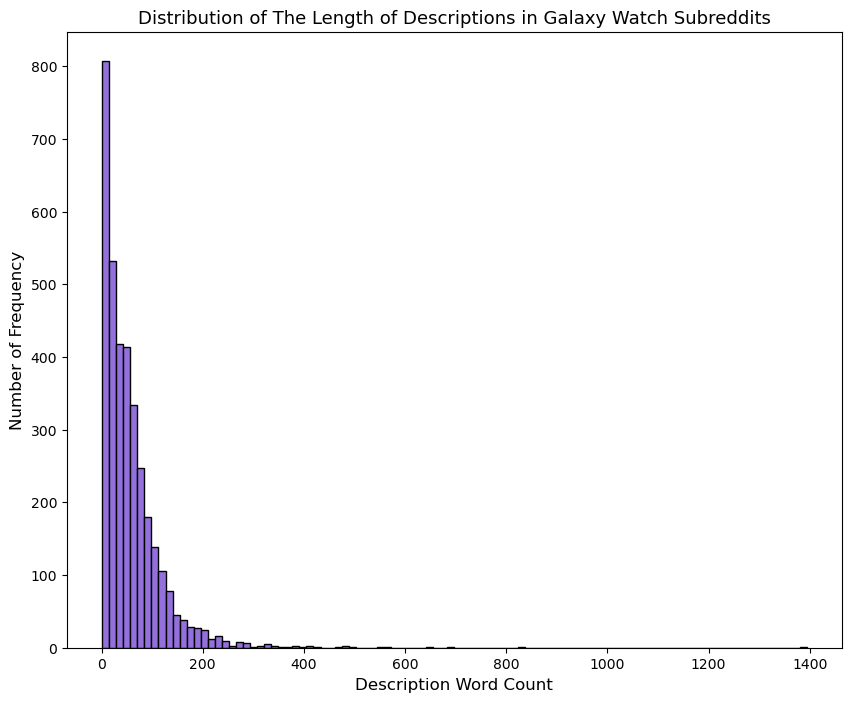

In [21]:
# distribution of description length based on word count
length_distribution(column=df_galaxywatch["des_word_count"],
                    title="Distribution of The Length of Descriptions in Galaxy Watch Subreddits",
                   x_label="Description Word Count",
                   num_bins=100,
                   color="mediumpurple")

In [27]:
# number of unique authors
print(f"Number of unique authors: {df_galaxywatch['author'].nunique()}")

# filtering description and counting them by their authors
df_galaxywatch.groupby("author")["description"].agg(["count"]).sort_values("count", ascending = False)

Number of unique authors: 2457


,count
author,
DADAMWF,23
Own_Statement_8788,18
No-Impress3806,14
rusahitam,14
MyWatchFace,14
...,...
Nightwing55,1
NightFuryX0,1
NightAshamed,1


In [34]:
# Drop the duplicate authors
df_galaxywatch.drop_duplicates(subset="author", keep="first", inplace=True)
print(f"The size of the galaxy watch subreddit dataframe after removing duplicate authors: {df_galaxywatch.shape[0]}")

The size of the galaxy watch subreddit dataframe after removing duplicate authors: 2457


In [250]:
# instantiate CountVectorizer and ftit and transform on corpus
X = df_galaxywatch['description']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3))
cvec.fit(X)
X = cvec.transform(X)

In [251]:
# convert X to dataframe
df_galvec = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
df_galvec.shape

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1999, 95031)

In [252]:
# sort dataframe for most occuring words
df_galvec.sum().sort_values(ascending=False).head(25)

watch           3127
galaxy          1000
phone            760
galaxy watch     736
samsung          612
app              472
just             459
battery          450
pro              415
like             401
use              352
google           342
ve               324
update           308
know             287
does             287
face             286
time             278
amp              254
new              247
got              239
classic          238
watch face       228
way              227
using            212
dtype: int64

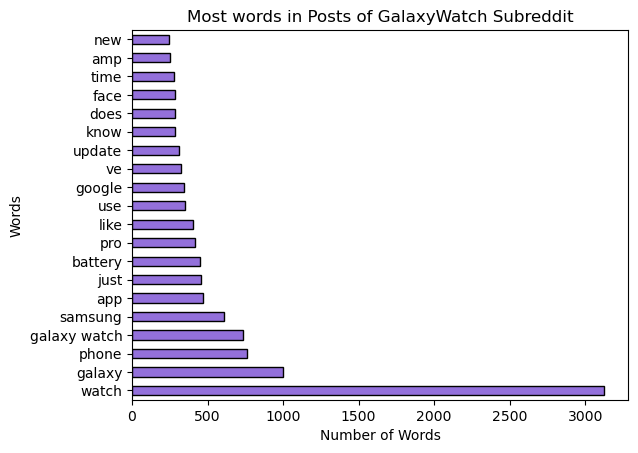

In [256]:
# plot most occured words
df_galvec.sum().sort_values(ascending=False).head(20).plot(kind='barh',
                            color = 'mediumpurple', edgecolor = 'black')
plt.title('Most words in Posts of GalaxyWatch Subreddit', fontsize=12)
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Words', fontsize=10);

### Apple Watch
In the following cells I'll do some exploring and cleaning in apple dataframe and will make a new dataframe as a apple watch which only has usefull columns for EDA

In [33]:
# load data
df_apple = pd.read_csv(apple_path)

# Get some basic information 
print(f"Sample Data :{df_apple.head()}")
print(f"\n--------------------------\n\n Columns : {[i for i in df_apple.columns]}")
print(f"\n--------------------------\n\n Size of the dataset : {df_apple.shape[0]}")
print(f"\n--------------------------\n\n Total number of columns : {df_apple.shape[1]}")

Sample Data :   Unnamed: 0   subreddit                                           selftext  \
0           0  AppleWatch  \nyes, it's an LTE watch with data turned on, ...   
1           1  AppleWatch                                                NaN   
2           2  AppleWatch  Fell very hard blackout drunk and lost watch. ...   
3           3  AppleWatch                                                NaN   
4           4  AppleWatch                                                NaN   

  author_fullname  gilded                                              title  \
0     t2_ufkkx07w       0  why is my S7 going from almost fully charged t...   
1     t2_f9u74w57       0  How accurate is the active/total calorie track...   
2     t2_8d4g53nt       0                     Lost watch when blackout drunk   
3        t2_my277       0  Pls tell me i‘m not the only one who has such ...   
4        t2_xos5u       0  Deleted Apps in Watch App on iPhone with weird...   

                  link_fl

In [34]:
print(f"The number of missing values in title column: {df_apple['title'].isna().sum()}")
print(f"The number of missing values in selftext column: {df_apple['selftext'].isna().sum()}")

The number of missing values in title column: 0
The number of missing values in selftext column: 1142


In [35]:
# check the type of missing values in selftext with theire equivalents in title
df_apple.loc[df_apple["selftext"].isna(), ["title", "selftext"]]

,title,selftext
1,How accurate is the active/total calorie track...,NaN
3,Pls tell me i‘m not the only one who has such ...,NaN
4,Deleted Apps in Watch App on iPhone with weird...,NaN
5,What is this complication?,NaN
7,Series 8 midnight with oem link bracelet,NaN
...,...,...
3483,is 92% battery health good for a second hand a...,NaN
3488,Now I can use the watch with peace of mind of ...,NaN
3490,Purchased the AW S8 in starlight with the chal...,NaN
3496,"First time testing clockology, fun app",NaN


In [37]:
# cite for using map str: https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/#:~:text=Combine%20Two%20Columns%20Using%20%2B%20Operator,does%20addition%20instead%20of%20concatenation.
# Fill missing values () in selftext with space
df_apple["selftext"] = df_apple["selftext"].fillna("")
df_apple["description"] = df_apple["selftext"].map(str) + df_apple["title"]

# check the description column
df_apple.loc[:,["title", "selftext", "description"]]

,title,selftext,description
0,why is my S7 going from almost fully charged t...,"\nyes, it's an LTE watch with data turned on, ...","\nyes, it's an LTE watch with data turned on, ..."
1,How accurate is the active/total calorie track...,,How accurate is the active/total calorie track...
2,Lost watch when blackout drunk,Fell very hard blackout drunk and lost watch. ...,Fell very hard blackout drunk and lost watch. ...
3,Pls tell me i‘m not the only one who has such ...,,Pls tell me i‘m not the only one who has such ...
4,Deleted Apps in Watch App on iPhone with weird...,,Deleted Apps in Watch App on iPhone with weird...
...,...,...,...
3494,LPT: Not sure your band is titanium? Use a mag...,"Stainless steel is magnetic, titanium is not. ...","Stainless steel is magnetic, titanium is not. ..."
3495,Trying to find specific watch face (pic included),Feel like this is a really dumb question but f...,Feel like this is a really dumb question but f...
3496,"First time testing clockology, fun app",,"First time testing clockology, fun app"
3497,Sleep paralysis and AW,,Sleep paralysis and AW


In [38]:
# make a new dataframe for EDA
df_applewatch = df_apple.loc[:,["author", "description", "subreddit"]]
df_applewatch.head()

,author,description,subreddit
0,TuaAnon,"\nyes, it's an LTE watch with data turned on, ...",AppleWatch
1,DemandScary1934,How accurate is the active/total calorie track...,AppleWatch
2,Vinumite,Fell very hard blackout drunk and lost watch. ...,AppleWatch
3,Damarou,Pls tell me i‘m not the only one who has such ...,AppleWatch
4,ThorNike13,Deleted Apps in Watch App on iPhone with weird...,AppleWatch


In [39]:
# check the missong values in new dataframe
df_applewatch.isna().sum()

author         0
description    0
subreddit      0
dtype: int64

In [42]:
# look for uncertain text
#df_galaxywatch.loc[df_galaxywatch['description'].str.contains('remove'),:].head()
#df_applewatch.loc[df_applewatch['description'].str.contains('remove'),:].head()

# remove uncertain text
#df_applewatch['description']=df_applewatch['description'].str.replace('[removed]', '')

In [142]:
# export and save a new dataframe
# df_applewatch.to_csv('../data/apple_watch.csv')

## EDA (Exploratory Data Analysis)

Here I'll do some EDA on my both dataframes to find any relationship between varibales, find high value information for presenting and also make new columns to see if I could use them for analysis

### Samsung Galaxy Watch

In the following I'll do some EDA on galaxy watch data frame

### Apple Watch

Making columns that countain the number of words in title and description

In [175]:
# drop column
df_appwatch = df_applewatch.drop(columns=['subreddit'], axis=1)

In [176]:
df_appwatch.dtypes

author          object
description     object
num_comments     int64
dtype: object

In [177]:
# make a new column to show word count of description
df_appwatch['des_word_count'] = df_appwatch['description'].str.split().str.len()

In [178]:
# five longest description
df_appwatch.sort_values(by = 'des_word_count', ascending=False).head()

,author,description,num_comments,des_word_count
1755,urcrain,There’s no doubting that the Apple Watch has p...,0,825
781,thetuko,Apple announced international roaming would be...,0,747
1500,sullf,"Hi, Apple Watch community, \nMy name is Fred...",0,575
330,quinnbryant,"Right, so for the past week I have experienced...",0,545
1934,realwoodbox,I got the Apple watch to help with my heath. ...,0,472


In [179]:
# five shortest description
df_appwatch.sort_values(by = 'des_word_count', ascending=False).tail()

,author,description,num_comments,des_word_count
1827,Single_Ad_843,Busy day,0,2
1980,karmante,🥱,0,1
1852,rr210600,duality,0,1
875,fh5h,Weird,0,1
1611,Alternative_Type2555,Lina,0,1


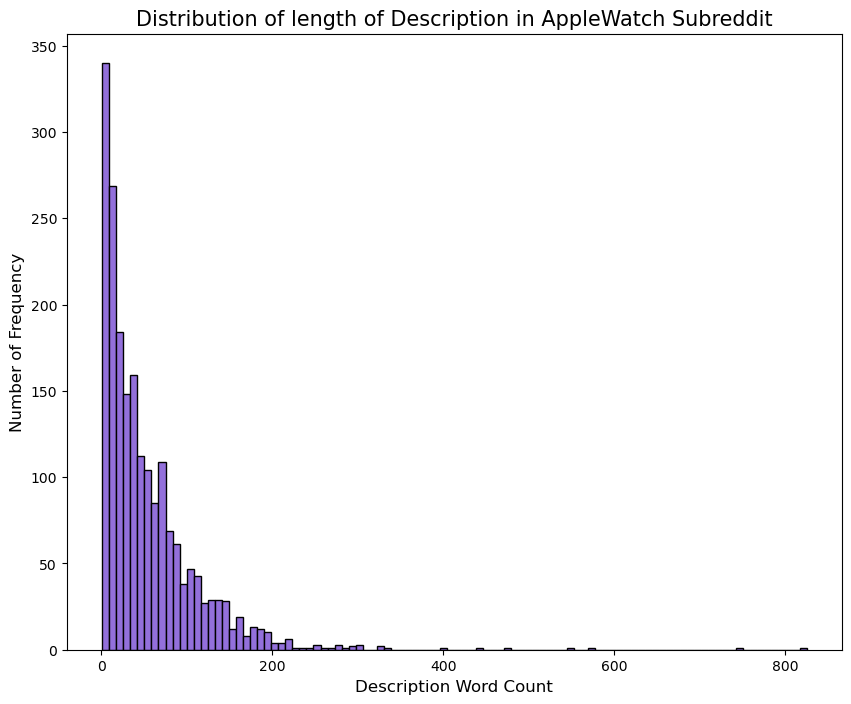

In [187]:
# distribution of description length based on word count
#Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_appwatch['des_word_count'], bins = 100, color = 'mediumpurple', edgecolor = 'black')
plt.title('Distribution of length of Description in AppleWatch Subreddit', fontsize=15)
plt.xlabel('Description Word Count', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

In [181]:
# descriptions with highest comments
df_appwatch.sort_values(by = 'num_comments', ascending=False).head()

,author,description,num_comments,des_word_count
166,monkeyofthefunk,I’ve always wanted a Pro or Pro Max Product Re...,28,78
185,lpug21,Hey all!\n\nMy partner and I recently picked u...,24,221
183,tommza_88,"Hi friends, just got my new iPhone 14 and tran...",18,38
194,acodysseygirl72,Does anyone recognize this watch face? I know ...,12,19
176,dudeneedshelp874,Black and volt..,10,3


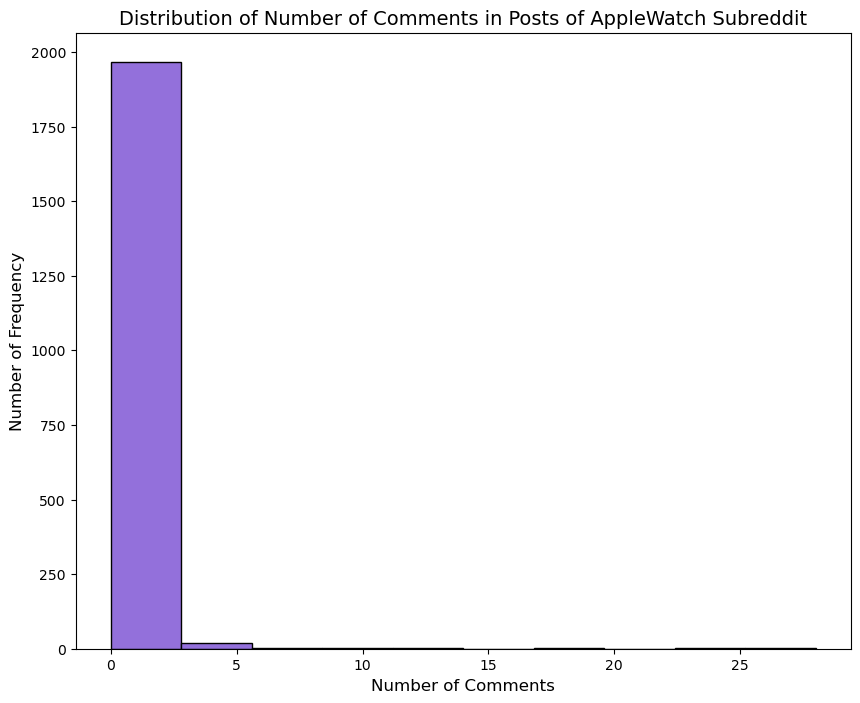

In [197]:
# distribution of number of comments
# Define size of bar plot
plt.figure(figsize=(10,8))
plt.hist(df_appwatch['num_comments'], bins = 10, color = 'mediumpurple', edgecolor = 'black')
plt.title('Distribution of Number of Comments in Posts of AppleWatch Subreddit', fontsize=14)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Number of Frequency', fontsize=12);

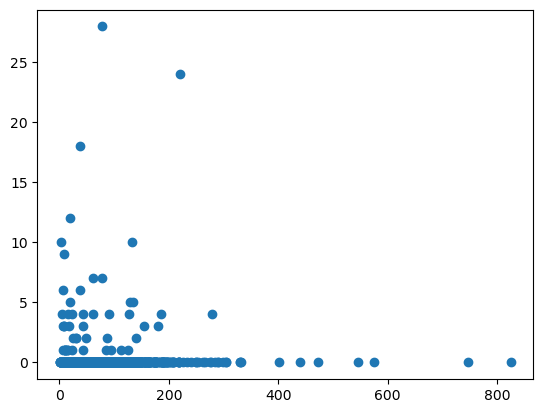

In [234]:
# relationship with lenght of description and number of comments
plt.scatter(df_appwatch['des_word_count'], df_appwatch['num_comments']);

In [235]:
# number of unique authors
df_appwatch['author'].nunique()

1629

In [236]:
# filtering description and counting them by their authors
df_appwatch.groupby('author')['description'].agg(['count']).sort_values('count', ascending = False)

,count
author,
Chasepaw21,20
minif56mike,10
AXXXXXXXXA,9
arjentic,8
PatTheDog123,8
...,...
Novemberx123,1
Novel-Highlight-3539,1
Not_Solid_System,1


In [237]:
# filter on the author with highest number of description to see the lenghts, number of comments
# and also his/her discriptions
df_appwatch.loc[df_appwatch['author'] == 'Chasepaw21', :]

,author,description,num_comments,des_word_count
803,Chasepaw21,Are some sport bands stiffer than other colors...,0,17
804,Chasepaw21,\n\n[View Poll](https://www.reddit.com/poll/11...,0,5
808,Chasepaw21,Me left\n\n[View Poll](https://www.reddit.com/...,0,15
895,Chasepaw21,Which sport band should I pick for my 41mm spa...,0,27
923,Chasepaw21,I am wondering how long will the sport band la...,0,21
925,Chasepaw21,At what date will Apple release the Fall bands?,0,9
953,Chasepaw21,What colors do you think will Apple release fo...,0,25
962,Chasepaw21,Suggestion for an AW full body protector?,0,7
963,Chasepaw21,Does Apple still sell the Spring band in the S...,0,10
1001,Chasepaw21,\n\n[View Poll](https://www.reddit.com/poll/11...,0,7


### could work on first author to see the kind of descriptions he made

In [238]:
# instantiate CountVectorizer and ftit and transform on corpus
X = df_appwatch['description']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3))
cvec.fit(X)
X = cvec.transform(X)

In [239]:
# convert X to dataframe
df_appvec = pd.DataFrame(X.todense(), columns = cvec.get_feature_names())
df_appvec.shape

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1996, 89737)

In [240]:
# sort dataframe for most occuring words
df_appvec.sum().sort_values(ascending=False).head(25)

watch          2388
apple          1552
apple watch    1102
just            500
app             486
series          453
like            406
sleep           362
ultra           360
phone           351
iphone          343
ve              300
band            300
use             291
time            287
does            281
battery         275
new             256
know            251
got             234
don             211
way             208
want            194
heart           187
day             184
dtype: int64

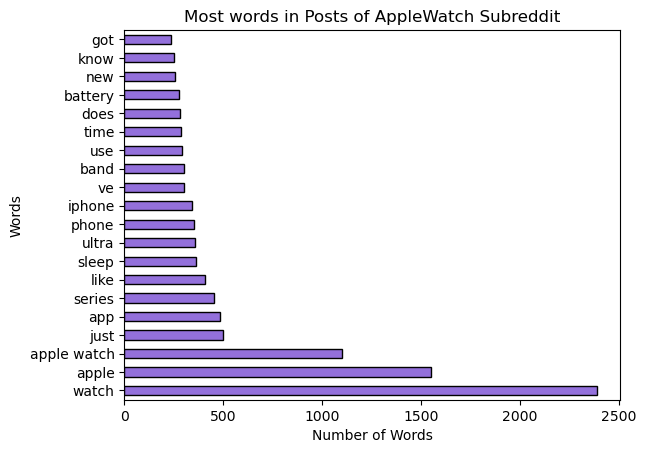

In [257]:
# plot most occured words
# Define size of bar plot

df_appvec.sum().sort_values(ascending=False).head(20).plot(kind='barh',
                            color = 'mediumpurple', edgecolor = 'black')
plt.title('Most words in Posts of AppleWatch Subreddit', fontsize=12)
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Words', fontsize=10);